# Use clustering algorithm(K-means) to divide the total data by the Top 10 most important features into several similar groups

In [1]:
CLUSTER_NUMS = 11
TEST_SIZE = 0.3
RANDOM_STATE = 42

# Top 10 most important features
TOP_IMPORTANCE = ['band_gap',
 'formation_energy_per_atom',
 'density_atomic',
 'MagpieData mean Electronegativity',
 'volume',
 'MagpieData minimum CovalentRadius',
 'MagpieData range Number',
 'MagpieData maximum Electronegativity',
 'density',
 'MagpieData range Electronegativity'][0:2]

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [3]:
# read data
data = pd.read_csv('../../data/domain_based_data.csv')

In [4]:
data.head()

,crystal_system,space_group,band_gap,volume,density,density_atomic,formation_energy_per_atom,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,e_electronic,e_ionic,e_total
0,4,11,0.7792,316.341404,5.022717,22.595815,-1.124079,16.0,56.0,40.0,...,215.0,110.0,130.428571,0.89,2.58,1.69,2.230000,9.929365,7.118969,17.048334
1,3,19,2.8980,253.915299,3.764366,15.869706,-3.099174,8.0,41.0,33.0,...,164.0,107.0,88.250000,1.60,3.98,2.38,3.115000,4.102533,13.469477,17.572010
2,5,1,1.7212,196.220495,3.094976,28.031499,-0.766100,16.0,38.0,22.0,...,195.0,90.0,121.857143,0.95,2.58,1.63,2.232857,6.045051,12.443616,18.488667
3,4,12,2.0944,620.336826,2.901260,12.923684,-1.948264,8.0,26.0,18.0,...,166.0,100.0,86.333333,0.93,3.44,2.51,2.953333,3.096120,6.499905,9.596025
4,3,62,7.4812,374.200384,1.860992,9.355010,-1.970766,1.0,9.0,8.0,...,84.0,53.0,50.700000,2.04,3.98,1.94,2.980000,1.866232,4.350314,6.216546


In [5]:
X = data.drop(['e_electronic', 'e_ionic', 'e_total'], axis=1)
y = data[['e_electronic', 'e_ionic', 'e_total']]
display(X.head())
display(y.head())

,crystal_system,space_group,band_gap,volume,density,density_atomic,formation_energy_per_atom,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity
0,4,11,0.7792,316.341404,5.022717,22.595815,-1.124079,16.0,56.0,40.0,30.285714,105.0,215.0,110.0,130.428571,0.89,2.58,1.69,2.230000
1,3,19,2.8980,253.915299,3.764366,15.869706,-3.099174,8.0,41.0,33.0,16.500000,57.0,164.0,107.0,88.250000,1.60,3.98,2.38,3.115000
2,5,1,1.7212,196.220495,3.094976,28.031499,-0.766100,16.0,38.0,22.0,24.000000,105.0,195.0,90.0,121.857143,0.95,2.58,1.63,2.232857
3,4,12,2.0944,620.336826,2.901260,12.923684,-1.948264,8.0,26.0,18.0,11.083333,66.0,166.0,100.0,86.333333,0.93,3.44,2.51,2.953333
4,3,62,7.4812,374.200384,1.860992,9.355010,-1.970766,1.0,9.0,8.0,5.200000,31.0,84.0,53.0,50.700000,2.04,3.98,1.94,2.980000


,e_electronic,e_ionic,e_total
0,9.929365,7.118969,17.048334
1,4.102533,13.469477,17.572010
2,6.045051,12.443616,18.488667
3,3.096120,6.499905,9.596025
4,1.866232,4.350314,6.216546


- Train and Test set split

In [6]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [7]:
kmeans = KMeans(n_clusters=CLUSTER_NUMS, random_state=RANDOM_STATE)

In [8]:
kmeans.fit(X_train[TOP_IMPORTANCE])

e:\software2\Anaconda\envs\pytorchEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=11, random_state=42)

In [9]:
X_train['cluster'] = kmeans.labels_

In [10]:
# predict clusters for test data
X_test['cluster'] = kmeans.predict(X_test[TOP_IMPORTANCE])

In [11]:
X_test.head()

,crystal_system,space_group,band_gap,volume,density,density_atomic,formation_energy_per_atom,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster
1414,2,189,0.9245,473.246667,3.461689,39.437222,-1.164229,34.0,37.0,3.0,35.500000,120.0,220.0,100.0,170.000000,0.82,2.55,1.73,1.685000,10
2908,6,162,0.0000,87.320161,5.791205,9.702240,-1.597766,8.0,33.0,25.0,15.777778,66.0,124.0,58.0,84.222222,1.91,3.44,1.53,2.990000,9
2860,5,2,1.3114,565.922230,3.367404,20.960083,-1.130545,1.0,53.0,52.0,18.370370,31.0,141.0,110.0,74.851852,1.31,3.44,2.13,2.578889,10
4803,4,12,1.8083,269.068882,4.987902,11.211203,-1.781247,8.0,51.0,43.0,15.666667,66.0,166.0,100.0,106.750000,0.93,3.44,2.51,2.441667,4
5163,4,15,3.4886,242.560637,3.970266,12.128032,-2.794766,8.0,49.0,41.0,13.600000,66.0,166.0,100.0,92.600000,0.93,3.44,2.51,2.715000,8


In [12]:
groups = X_train.groupby('cluster')

In [13]:
for cluster, df in groups:
    print(f'Cluster {cluster}: {len(df)} samples')
    # display(df.head(5))

Cluster 0: 371 samples
Cluster 1: 302 samples
Cluster 2: 521 samples
Cluster 3: 523 samples
Cluster 4: 615 samples
Cluster 5: 111 samples
Cluster 6: 755 samples
Cluster 7: 160 samples
Cluster 8: 462 samples
Cluster 9: 497 samples
Cluster 10: 766 samples


- Visualize the clusters

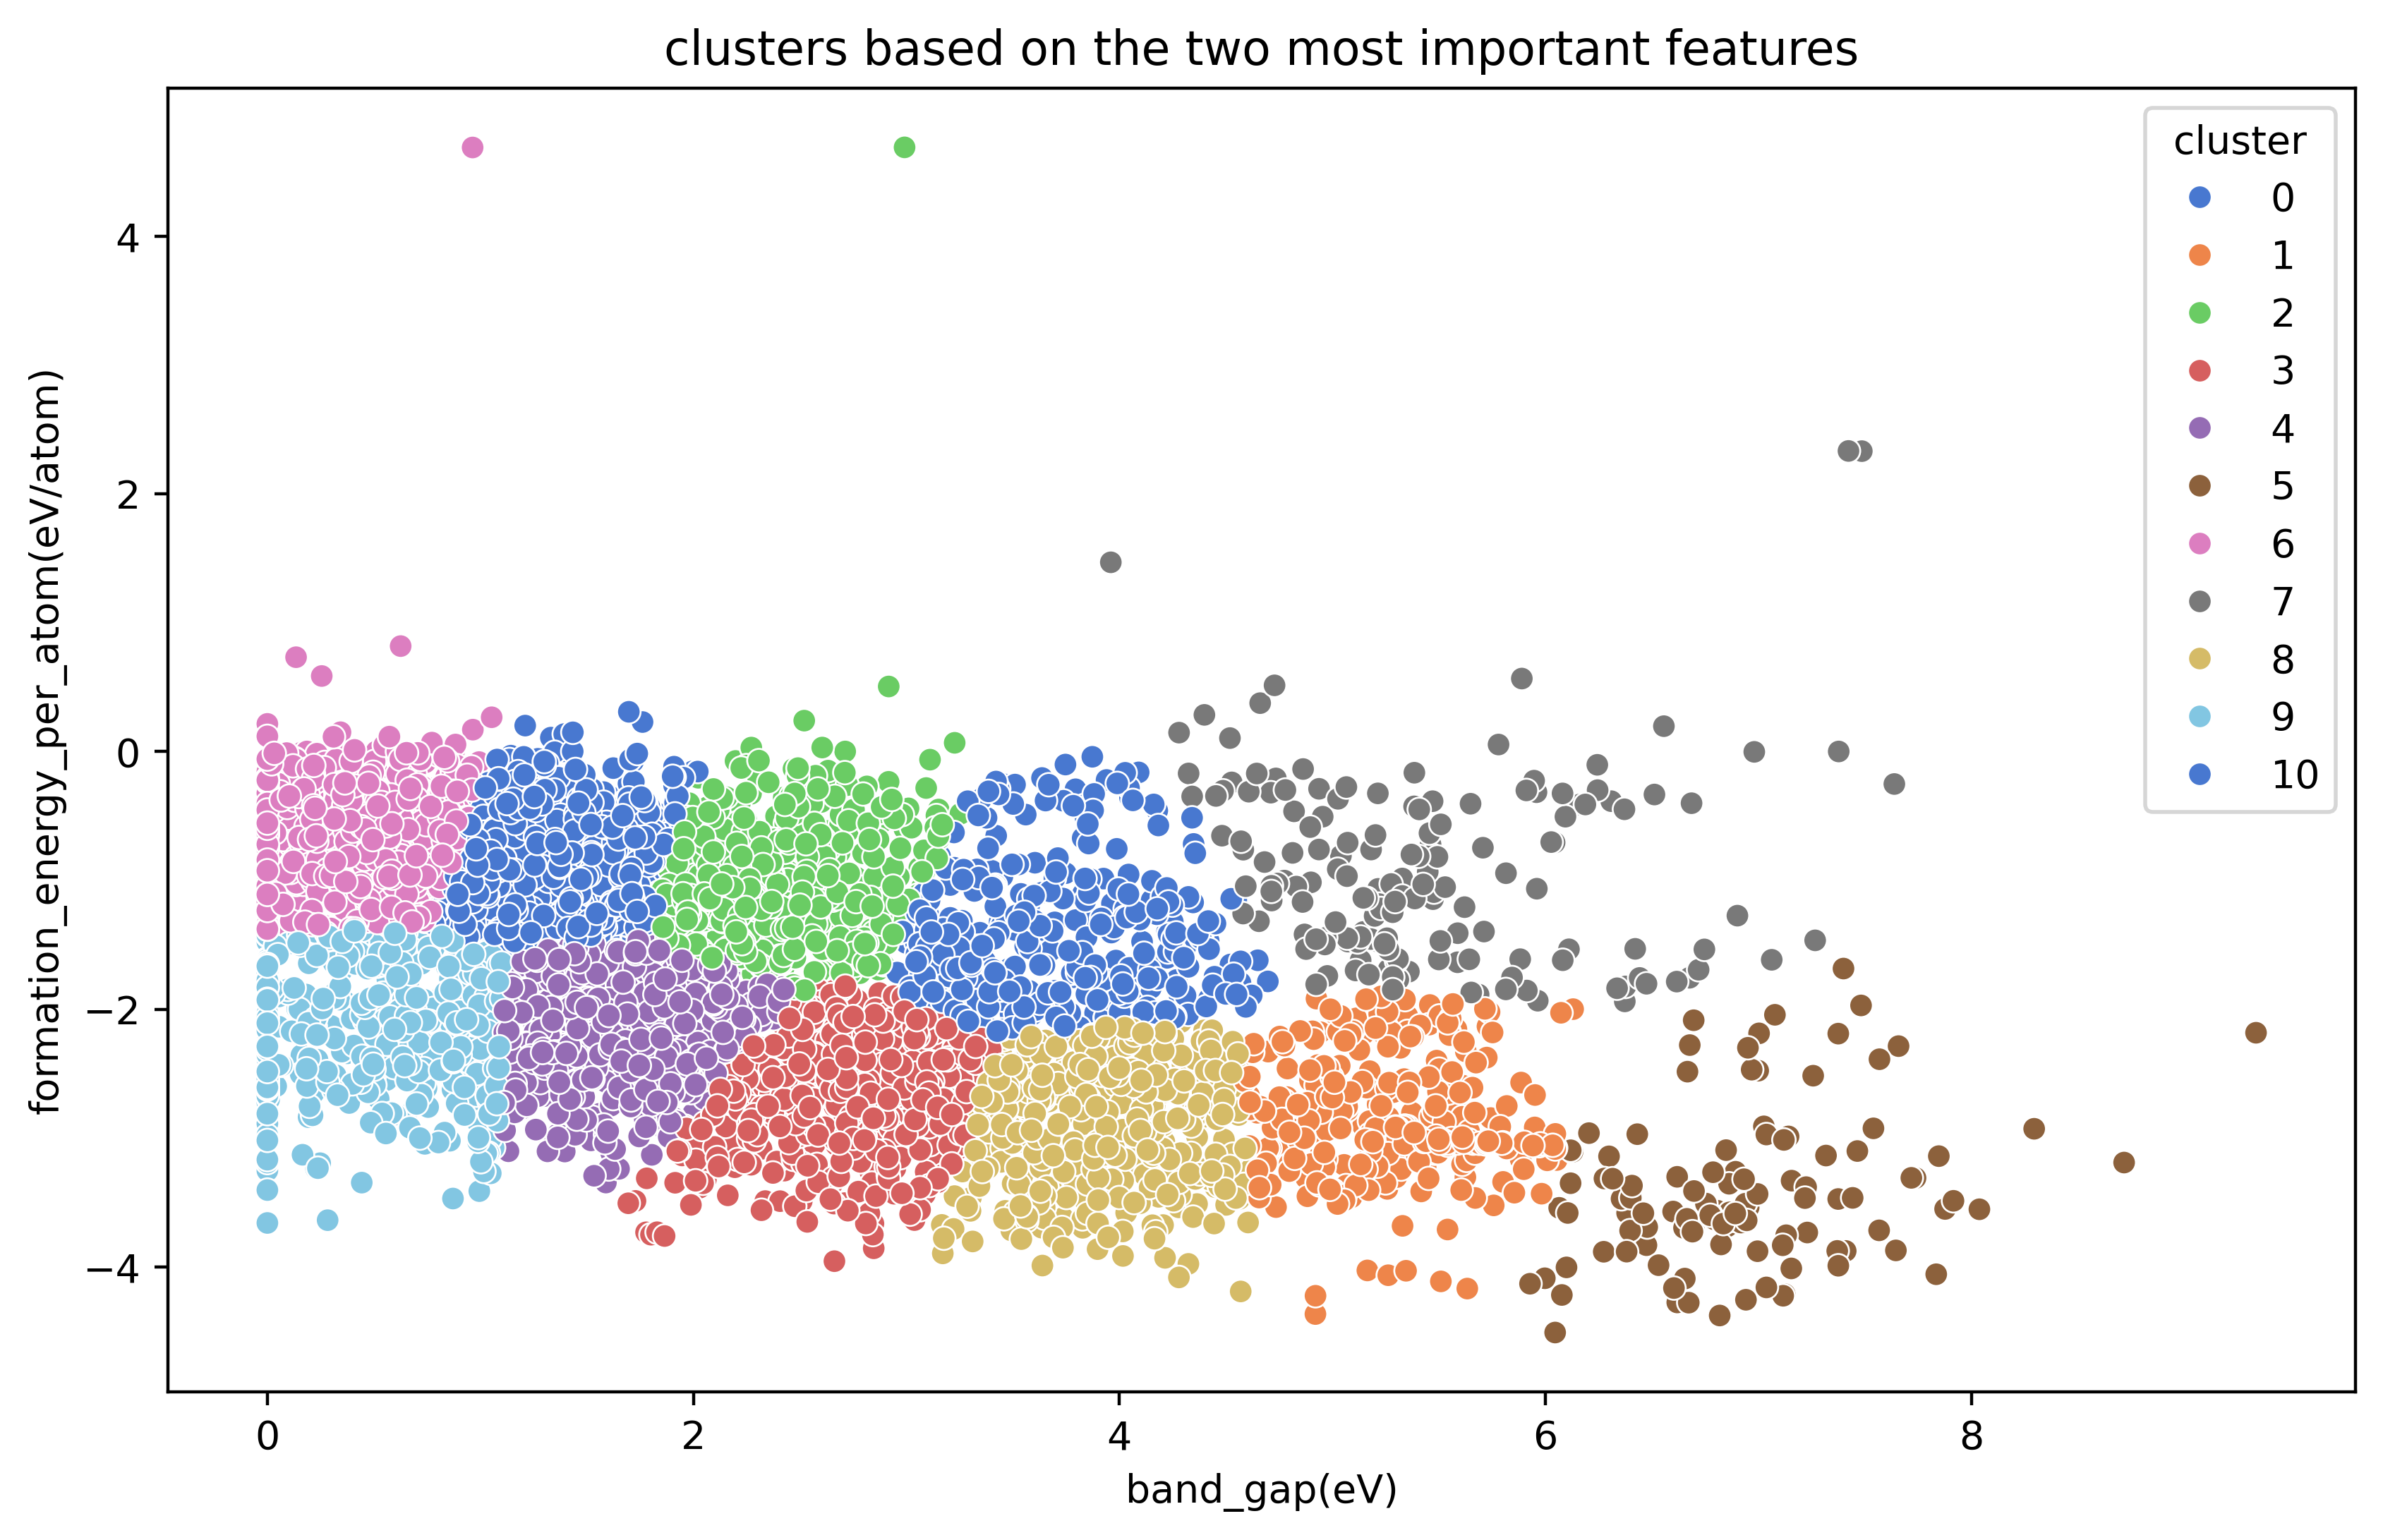

In [14]:
X_temp = X_train.copy()
X_temp['e_electronic'] = y_train['e_electronic']
X_temp['e_total'] = data.iloc[X_temp.index, :]['e_total']
# visualize clusters
# use seaborn to visualize clusters
import seaborn as sns
plt.figure(figsize=(10, 6), dpi=400)
sns.scatterplot(data=X_temp, x='band_gap', y='formation_energy_per_atom', hue='cluster', palette=sns.color_palette('muted',n_colors=CLUSTER_NUMS))
# plt.xscale('log')
# plt.yscale('log')
# cluster based on the two most important features
plt.title('clusters based on the two most important features')
plt.xlabel('band_gap(eV)')
plt.ylabel('formation_energy_per_atom(eV/atom)')

# save picture
plt.savefig('../../figures/domain_based/clusters.png')
plt.show()


In [15]:
# Merge X_train and y_train
train_set = X_train.copy()
train_set[['e_electronic', 'e_ionic', 'e_total']] = y_train
# Merge X_test and y_test
test_set = X_test.copy()
test_set[['e_electronic', 'e_ionic', 'e_total']] = y_test

In [16]:
train_set['class'] = 'train'
test_set['class'] = 'test'
set = pd.concat([train_set, test_set])
set.head()

,crystal_system,space_group,band_gap,volume,density,density_atomic,formation_energy_per_atom,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster,e_electronic,e_ionic,e_total,class
2154,4,12,0.3593,66.249645,8.647377,16.562411,-1.022655,8.0,80.0,72.0,...,102.000000,1.69,3.44,1.75,2.642500,6,5.807363,3.770194,9.577558,train
1344,2,186,5.2239,488.540699,2.644605,22.206395,-2.775097,8.0,20.0,12.0,...,125.636364,1.00,3.44,2.44,2.400000,1,3.229764,8.055110,11.284874,train
7022,4,14,8.2939,417.193072,2.159094,13.037283,-2.928047,5.0,9.0,4.0,...,63.750000,2.04,3.98,1.94,3.495000,5,1.624871,0.563809,2.188679,train
5445,6,164,3.1183,179.999621,3.792487,16.363602,-2.462943,8.0,42.0,34.0,...,91.909091,1.33,3.44,2.11,3.015455,3,3.727241,7.620234,11.347476,train
2687,1,82,0.8566,176.302334,4.805648,25.186048,-0.806761,25.0,34.0,9.0,...,123.285714,1.55,2.55,1.00,2.195714,6,7.738875,3.180481,10.919357,train


In [17]:
set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7262 entries, 2154 to 6240
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   crystal_system                        7262 non-null   int64  
 1   space_group                           7262 non-null   int64  
 2   band_gap                              7262 non-null   float64
 3   volume                                7262 non-null   float64
 4   density                               7262 non-null   float64
 5   density_atomic                        7262 non-null   float64
 6   formation_energy_per_atom             7262 non-null   float64
 7   MagpieData minimum Number             7262 non-null   float64
 8   MagpieData maximum Number             7262 non-null   float64
 9   MagpieData range Number               7262 non-null   float64
 10  MagpieData mean Number                7262 non-null   float64
 11  MagpieData minimum 

In [18]:
# save set
set.to_csv('../../data/clustered_by_all_features/domain_based_data.csv', index=False)

# The Cluster 6 has the highest mse and mae, why?

In [19]:
# save cluster 6
cluster_6 = set[set['cluster'] == 6]
cluster_6.to_csv('../../data/clustered_by_all_features/domain_based_data_cluster_6.csv', index=False)

In [20]:
cluster_6.nunique()

crystal_system                             7
space_group                              115
band_gap                                 932
volume                                  1063
density                                 1063
density_atomic                          1063
formation_energy_per_atom               1061
MagpieData minimum Number                 51
MagpieData maximum Number                 69
MagpieData range Number                   82
MagpieData mean Number                   477
MagpieData minimum CovalentRadius         27
MagpieData maximum CovalentRadius         48
MagpieData range CovalentRadius          127
MagpieData mean CovalentRadius           660
MagpieData minimum Electronegativity      56
MagpieData maximum Electronegativity      28
MagpieData range Electronegativity       253
MagpieData mean Electronegativity        804
cluster                                    1
e_electronic                            1063
e_ionic                                 1061
e_total   

In [21]:
# # cluster 2 only has 195 samples, so we discard it
# # cluster 6 only has 23 sample, so we discard it
# set = set[(set['cluster'] != 2) & (set['cluster'] != 6)]
# len(set)
# # display(set.head())

## Cluster Again

In [22]:
# # After removing cluster 2, 6, do clustering again
# X_train2 = set[set['class'] == 'train'].drop(columns=['e_electronic', 'e_ionic', 'e_total', 'class', 'cluster'])
# X_test2 = set[set['class'] == 'test'].drop(columns=['e_electronic', 'e_ionic', 'e_total', 'class', 'cluster'])

In [23]:
# kmeans2 = KMeans(n_clusters=CLUSTER_NUMS-1, random_state=RANDOM_STATE)
# kmeans2.fit(X_train2)

In [24]:
# X_train2['cluster'] = kmeans2.labels_
# X_test2['cluster'] = kmeans2.predict(X_test2)

In [25]:
# X_train2.head()

In [26]:
# X_test2.head()

In [27]:
# # 
# grouped2 = X_train2.groupby('cluster')
# for cluster, df in grouped2:
#     print(f'Cluster {cluster}: {len(df)} samples')

In [28]:
# X_train2['class'] = 'train'
# X_test2['class'] = 'test'
# save_set = pd.concat([X_train2, X_test2])
# save_set[['e_electronic', 'e_ionic', 'e_total']] = set[['e_electronic', 'e_ionic', 'e_total']]
# save_set.head()

In [29]:
# save data
# save_set.to_csv('../../data/clustered_by_all_features/domain_based_data.csv', index=False)